In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams['figure.figsize'] = (20, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams.update({'font.size': 22})

peak_idx = [ 12  50  87 132 171]


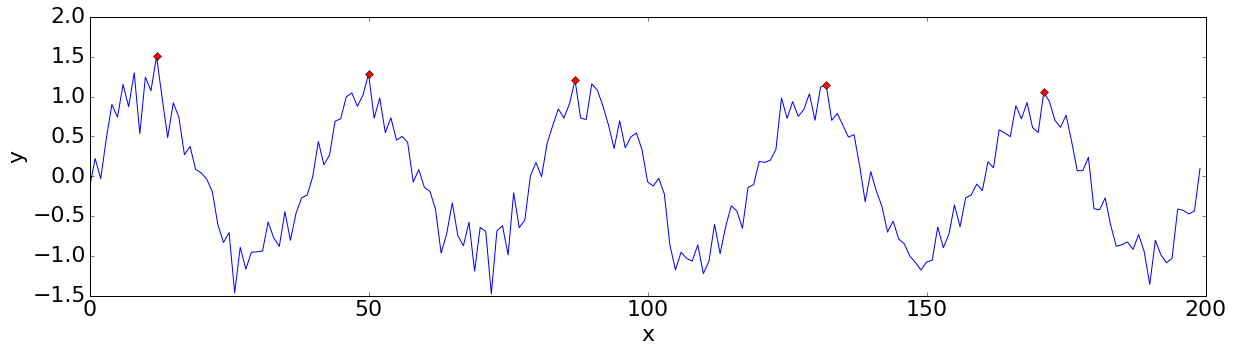

In [2]:
def detect_peaks(x, num_train, num_guard, rate_fa):
    """
    Detect peaks with CFAR algorithm.
    
    num: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate. 
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
 
    alpha = num_train*(rate_fa**(-1/num_train) - 1) # threshold factor
    
    peak_idx = []
    for i in range(num_side, num_cells - num_side):
        
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]): 
            continue
        
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) 
        p_noise = (sum1 - sum2) / num_train 
        threshold = alpha * p_noise
        
        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=int)
    
    return peak_idx

y = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
x = np.arange(y.size)

# Detect peaks
peak_idx = detect_peaks(y, num_train=10, num_guard=2, rate_fa=1e-3)
print("peak_idx =", peak_idx)

plt.plot(x, y)
plt.plot(x[peak_idx], y[peak_idx], 'rD')
plt.xlabel('x')
plt.ylabel('y')